In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Config
c_url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
# Frecuencia en días
c_freq = 3
# Periodos
c_periods = 6

In [3]:
# Load csv 
df = pd.read_csv(c_url)

In [4]:
# Preprocessing
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()

In [5]:
# dfV: Registros con los valores acumulados cada x días
fFechas = pd.date_range(end=last_fecha, freq= str(c_freq) + 'D', periods=c_periods+1)
filtro = df['Fecha'].isin(fFechas)
dfV = df[filtro].copy()

# Indices
dfV.set_index(['Provincia', 'Fecha'], inplace=True)
dfV.sort_index(level=['Provincia', 'Fecha'], inplace=True)

# Ordenar columnas
dfV.columns = ['Hospitalizadas', 'Curadas', 'Bajas']

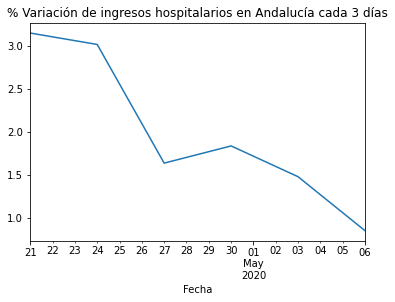

In [6]:
# dfG: Variación en porcentaje con respecto al registro anterior
dfG = dfV.groupby(level='Provincia').pct_change()*100
dfG.dropna(how='all', inplace=True)
titulo = '% Variación de ingresos hospitalarios en Andalucía cada ' + str(c_freq) + ' días'
dfG.loc['Total']['Hospitalizadas'].plot(title=titulo)
plt.show()

In [7]:
# dfN: Nuevos casos cada x días
dfN = dfV.diff()
first_fecha = fFechas.min()

# Se borra la primera fila ya que no tiene valores anteriores y su resultado no tiene sentido
dfN.drop(index=first_fecha, level='Fecha', inplace=True)
# Alternativa seleccionando las filas y borrando
#delete_rows = dfN.loc[(slice(None), [first_fecha]), :].index
#dfN.drop(delete_rows, inplace=True)

# Se borran las filas de Total
dfN.drop(index='Total', level='Provincia', inplace=True)

In [8]:
print('Nuevos casos en los ' + str(c_freq) + ' días anteriores')
print(dfN.sort_index())

Nuevos casos en los 3 días anteriores
                      Hospitalizadas  Curadas  Bajas
Provincia Fecha                                     
Almería   2020-04-21             5.0     34.0    2.0
          2020-04-24             7.0     36.0    1.0
          2020-04-27             4.0     42.0    2.0
          2020-04-30             3.0     61.0    2.0
          2020-05-03             1.0     50.0    1.0
          2020-05-06             0.0      4.0    0.0
Cádiz     2020-04-21            26.0     14.0    1.0
          2020-04-24             8.0     22.0   17.0
          2020-04-27            14.0      3.0   10.0
          2020-04-30            16.0     28.0   14.0
          2020-05-03            14.0     25.0   19.0
          2020-05-06            11.0     20.0    3.0
Córdoba   2020-04-21            11.0     16.0    7.0
          2020-04-24            15.0     33.0    8.0
          2020-04-27             7.0    292.0    8.0
          2020-04-30             8.0     34.0    3.0
        

## Detalle de una provincia

In [9]:
# Detalle de una provincia
c_provincia = 'Sevilla'

In [10]:
titulo = 'Nuevos casos en ' + c_provincia + ' en los ' + str(c_freq) + ' días anteriores'
print(titulo)
print(dfN.loc[c_provincia]['Hospitalizadas'])

Nuevos casos en Sevilla en los 3 días anteriores
Fecha
2020-04-21    28.0
2020-04-24    41.0
2020-04-27    22.0
2020-04-30    29.0
2020-05-03    25.0
2020-05-06     6.0
Name: Hospitalizadas, dtype: float64


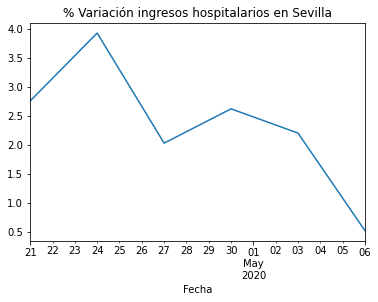

In [11]:
dfG.loc[c_provincia]['Hospitalizadas'].plot(title='% Variación ingresos hospitalarios en ' + c_provincia)
plt.show()

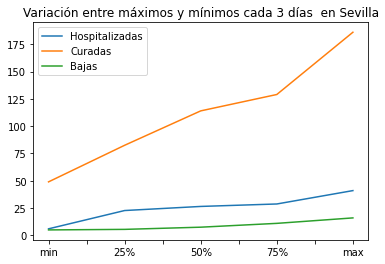

In [12]:
titulo = 'Variación entre máximos y mínimos cada ' + str(c_freq) + ' días  en ' + c_provincia
dfN.loc[c_provincia].describe().loc['min':'max'].plot(title=titulo)
plt.show()

### Últimos 10 días

In [13]:
c_last = 10
data = df.set_index(['Provincia', 'Fecha']).loc[c_provincia][['Ingresados', 'Altas', 'Bajas']].diff().tail(c_last).copy()
data.columns = ['Hospitalizadas', 'Curadas', 'Bajas']
titulo = 'Nuevos casos en los últimos ' + str(c_last) + ' días en ' + c_provincia

Nuevos casos en los últimos 10 días en Sevilla. (Nuevos ingresos hospitalarios)


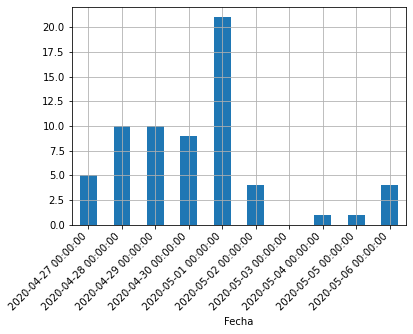

In [14]:
print(titulo + '. (Nuevos ingresos hospitalarios)')
data['Hospitalizadas'].plot(kind='bar', grid=True)
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

In [15]:
print(titulo)
print(data)

Nuevos casos en los últimos 10 días en Sevilla
            Hospitalizadas  Curadas  Bajas
Fecha                                     
2020-04-27             5.0     31.0    1.0
2020-04-28            10.0     40.0    3.0
2020-04-29            10.0     57.0    5.0
2020-04-30             9.0     89.0    4.0
2020-05-01            21.0     62.0    4.0
2020-05-02             4.0     53.0    3.0
2020-05-03             0.0     15.0    0.0
2020-05-04             1.0     20.0    3.0
2020-05-05             1.0      8.0    1.0
2020-05-06             4.0     48.0    1.0


In [16]:
data.describe()

,Hospitalizadas,Curadas,Bajas
count,10.000000,10.000000,10.000000
mean,6.500000,42.300000,2.500000
std,6.311365,24.684903,1.649916
min,0.000000,8.000000,0.000000
25%,1.750000,22.750000,1.000000
50%,4.500000,44.000000,3.000000
75%,9.750000,56.000000,3.750000
max,21.000000,89.000000,5.000000
